In [3]:
# importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA IMPORT AND OVERVIEW

In [4]:
df_train = pd.read_csv(r"C:\Users\Sowmi\Downloads\aug_train.csv")

In [3]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
pd.set_option('display.max_columns', None) # option to show all columns

In [9]:
df_train.columns = df_train.columns.str.strip() #The dataset is cleaned by stripping any unwanted spaces in column names

In [11]:
df_train.shape #rows and features

(19158, 14)

In [33]:
data_datatype = df_train.dtypes # datatype of features
print(data_datatype)

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


In [35]:
df_train.isnull().sum() #checking for null values

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [26]:
print(df_train.nunique()) #no of unique value in each column

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64


# EXPLORATORY DATA ANALYSIS

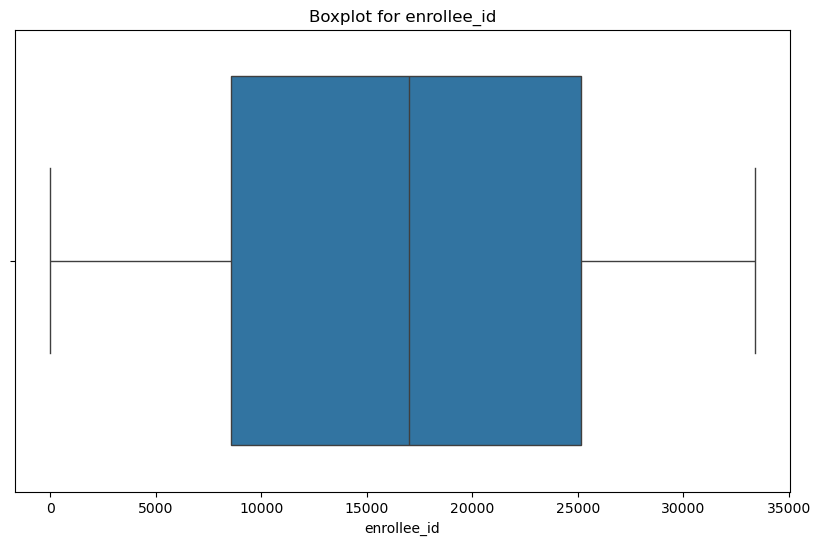

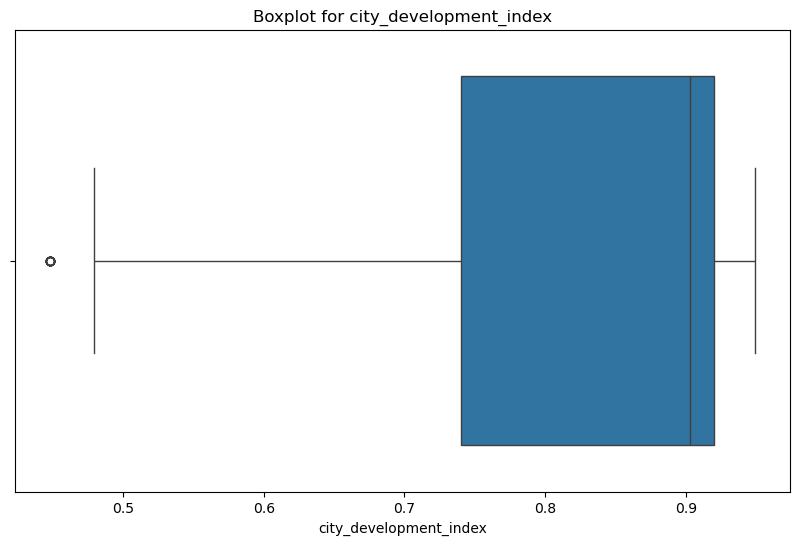

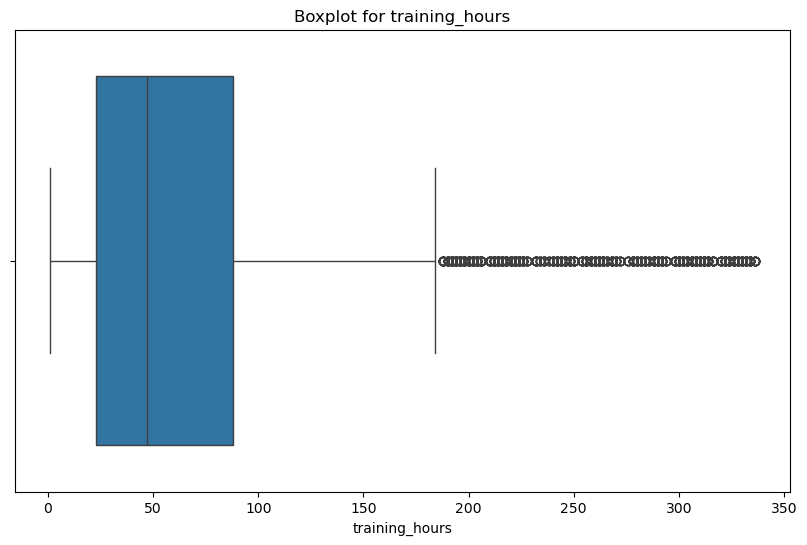

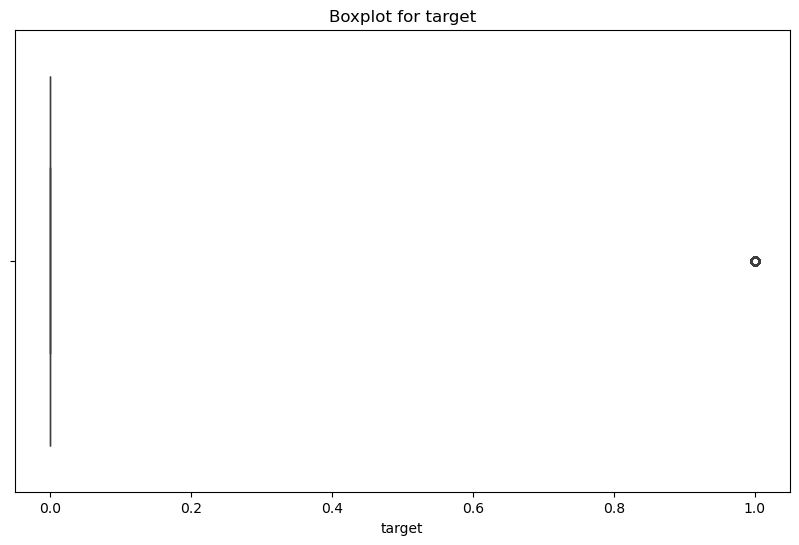

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df_train.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9944\617581756.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[feature].cat.categories)


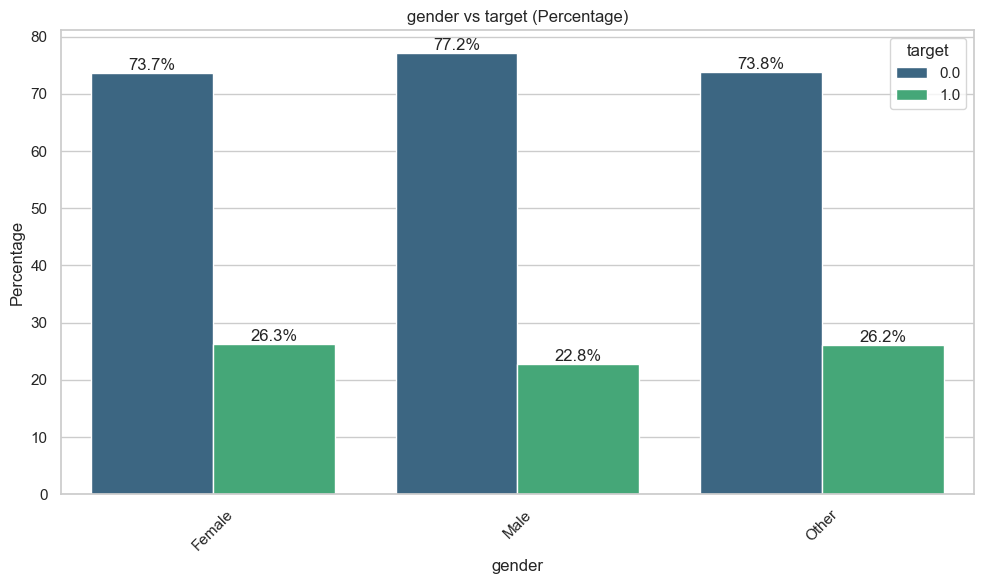

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9944\617581756.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[feature].cat.categories)


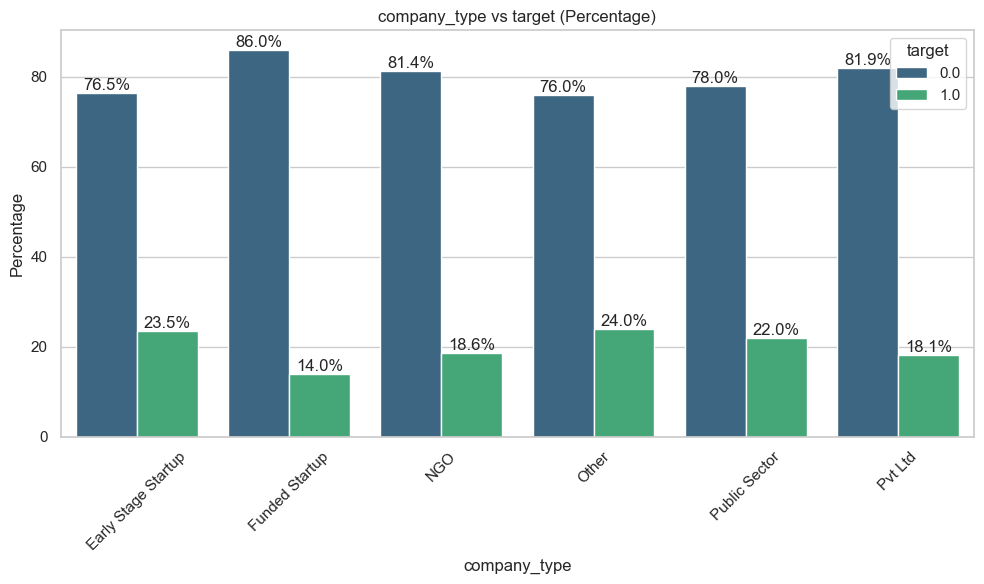

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9944\617581756.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[feature].cat.categories)


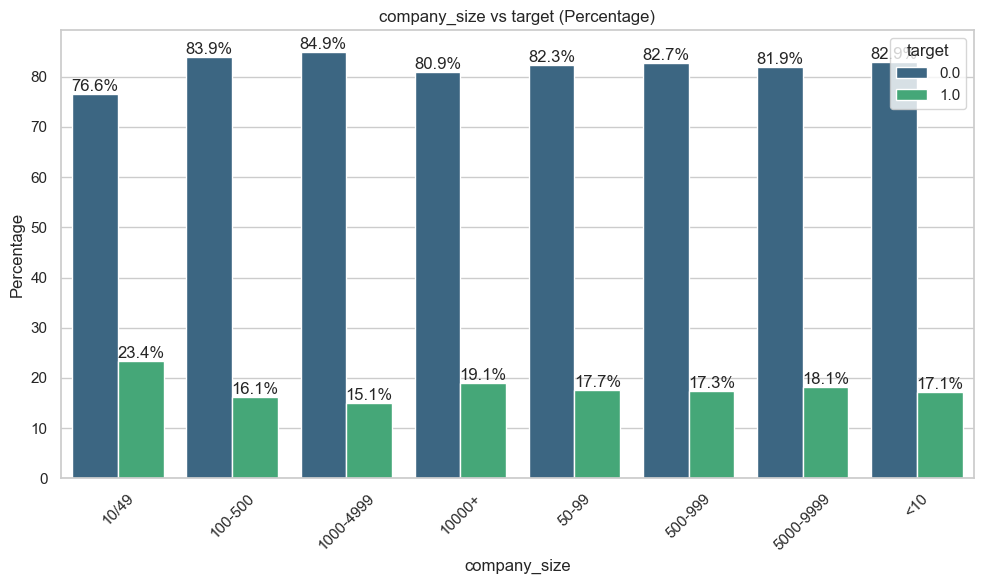

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9944\617581756.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[feature].cat.categories)


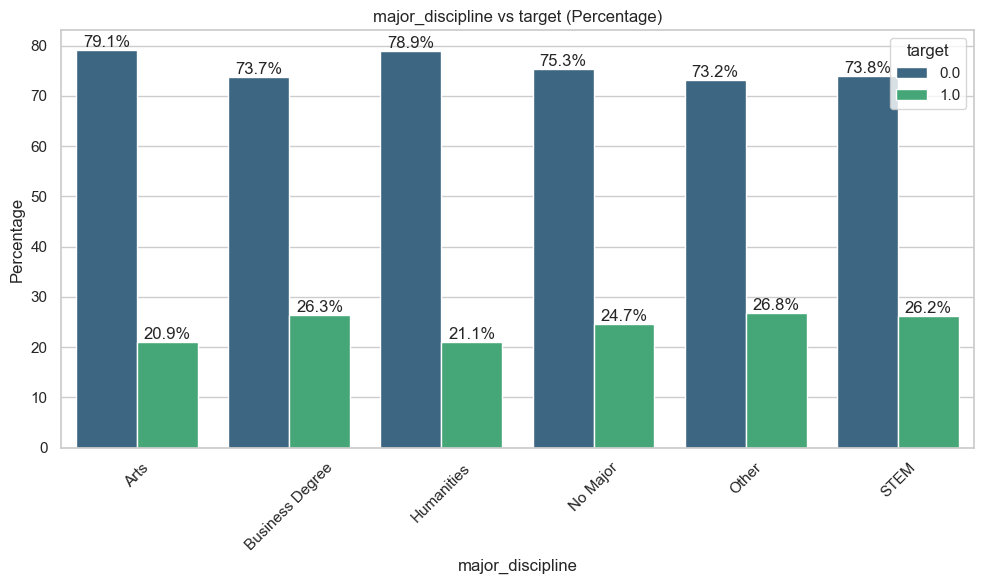

In [9]:
# Converting categorical columns to 'category' data_type
categorical_columns = ['gender', 'company_type', 'company_size', 'major_discipline']
df_train[categorical_columns] = df_train[categorical_columns].astype('category')


sns.set(style="whitegrid")

def plot_categorical_percentage(df, feature, target='target', save_path=None):
    df[feature] = df[feature].astype('category')
    
    # Calculate the percentage distribution
    category_counts = pd.crosstab(df[feature], df[target], normalize='index') * 100
    category_counts = category_counts.reset_index()
    
    # Melt the dataframe to a long format for seaborn
    melted_df = category_counts.melt(id_vars=feature, value_vars=df[target].unique(), 
                                     var_name=target, value_name='Percentage')
    
    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=melted_df, x=feature, y='Percentage', hue=target, palette='viridis')
    
    # Adding percentage values on top of each bar
    for p in ax.containers:
        ax.bar_label(p, fmt='%.1f%%', label_type='edge')
    
    plt.title(f"{feature} vs {target} (Percentage)")
    plt.xlabel(feature)
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.tight_layout()
    ax.set_xticklabels(df[feature].cat.categories)
    plt.show()

# Plotting each categorical feature as a percentage
plot_categorical_percentage(df_train, 'gender')
plot_categorical_percentage(df_train, 'company_type')
plot_categorical_percentage(df_train, 'company_size')
plot_categorical_percentage(df_train, 'major_discipline')


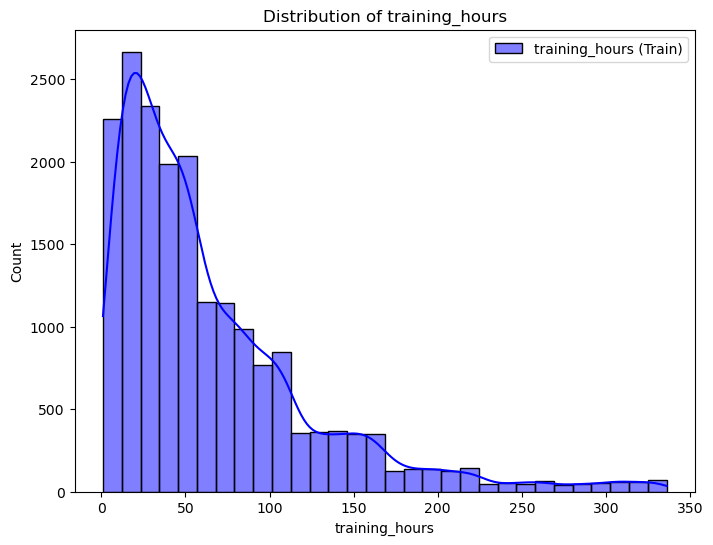

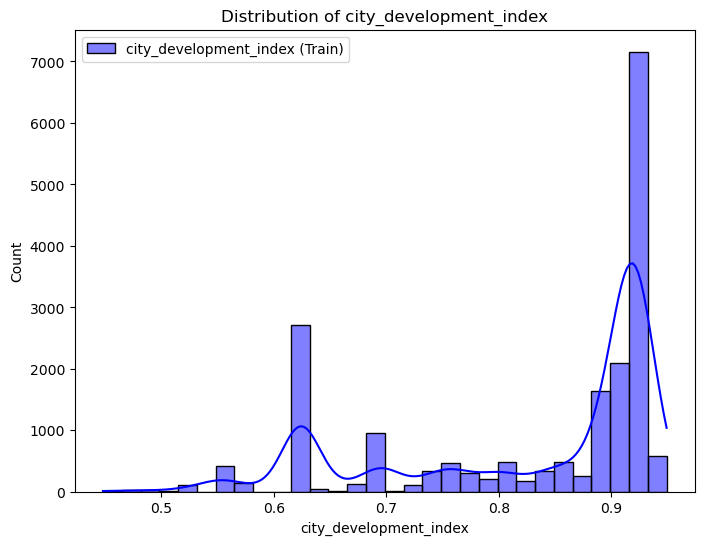

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['training_hours', 'city_development_index']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col], kde=True, color='blue', bins=30, label=f'{col} (Train)')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9112\511445178.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_train, palette='Set2')


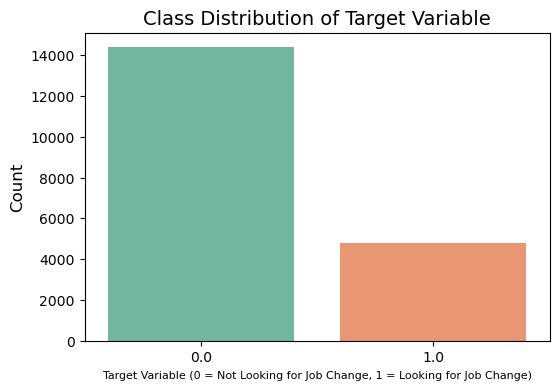

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_train, palette='Set2')

plt.title('Class Distribution of Target Variable', fontsize=14)
plt.xlabel('Target Variable (0 = Not Looking for Job Change, 1 = Looking for Job Change)', fontsize=8)
plt.ylabel('Count', fontsize=12)

plt.show()

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9944\3882326379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_train, palette='Blues', label='Train')


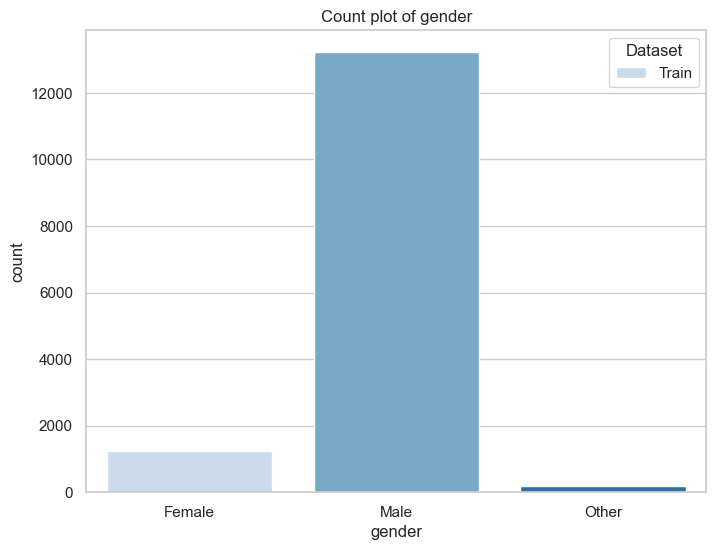

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9944\3882326379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_train, palette='Blues', label='Train')


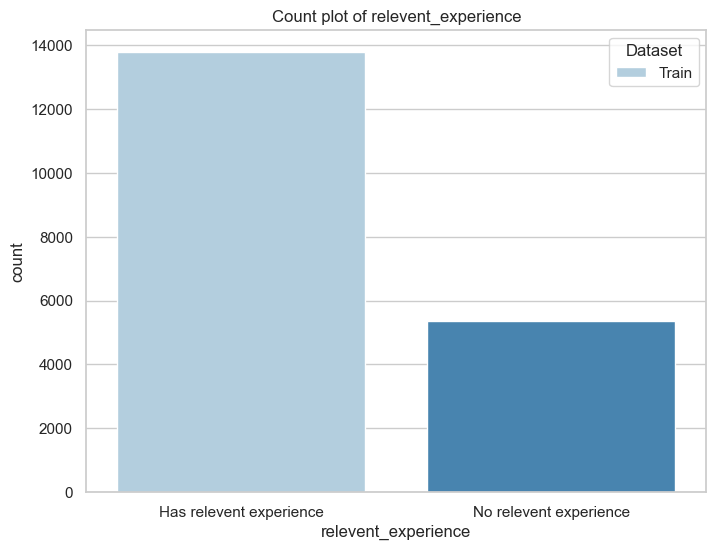

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9944\3882326379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_train, palette='Blues', label='Train')


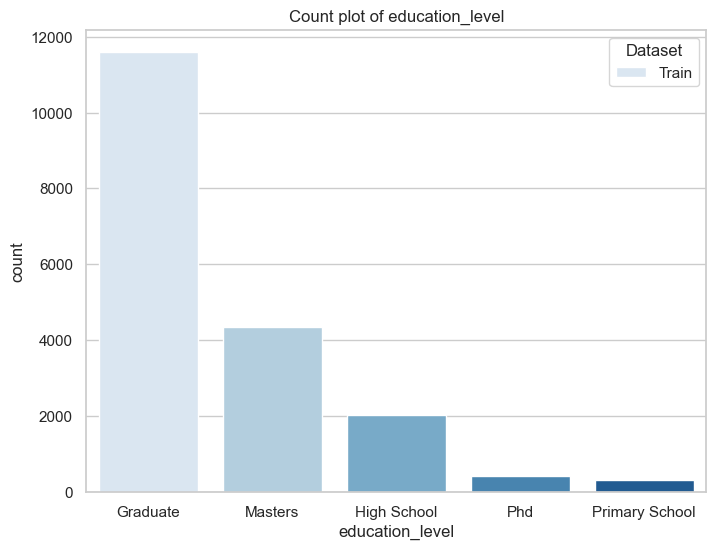

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9944\3882326379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_train, palette='Blues', label='Train')


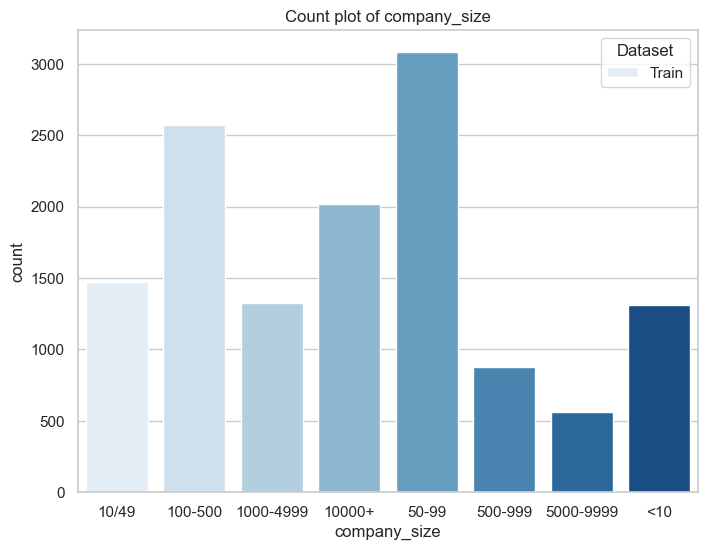

In [11]:
categorical_cols = ['gender', 'relevent_experience', 'education_level', 'company_size']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_train, palette='Blues', label='Train')
    plt.title(f'Count plot of {col}')
    plt.legend(title='Dataset', labels=['Train'])
    plt.show()

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9112\2587661468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='training_hours', data=df_train, palette='Set2')


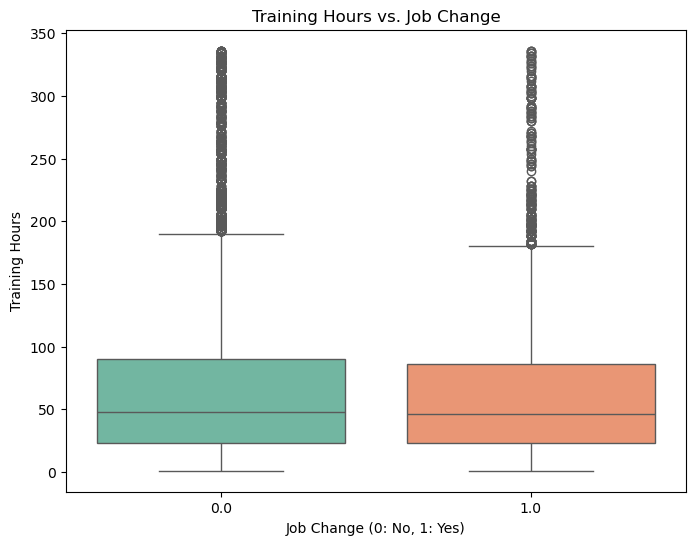

C:\Users\Sowmi\AppData\Local\Temp\ipykernel_9112\2587661468.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='city_development_index', data=df_train, palette='Set2')


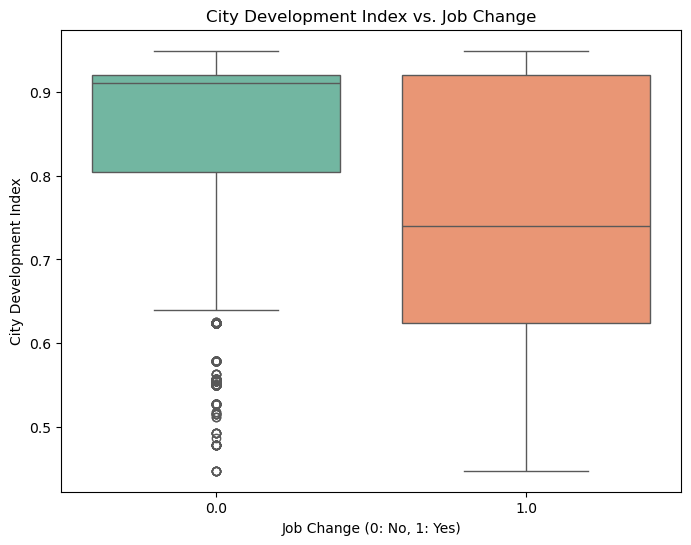

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'Training Hours' vs. Job Change
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='training_hours', data=df_train, palette='Set2')
plt.title('Training Hours vs. Job Change')
plt.xlabel('Job Change (0: No, 1: Yes)')
plt.ylabel('Training Hours')
plt.show()

# Boxplot for 'City Development Index' vs. Job Change
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='city_development_index', data=df_train, palette='Set2')
plt.title('City Development Index vs. Job Change')
plt.xlabel('Job Change (0: No, 1: Yes)')
plt.ylabel('City Development Index')
plt.show()


# Capping outliers

In [11]:
def cap_outliers(df, column, lower_percentile=5, upper_percentile=95):
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    
    # Capping values below lower_limit to lower_limit
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    
    # Capping values above upper_limit to upper_limit
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    
    return df

df_train = cap_outliers(df_train, 'training_hours', 5, 95)
df_train = cap_outliers(df_train, 'city_development_index', 5, 95)

print(df_train[['training_hours', 'city_development_index']].describe())


       training_hours  city_development_index
count    19158.000000            19158.000000
mean        62.417789                0.831352
std         50.402806                0.116879
min          7.000000                0.624000
25%         23.000000                0.740000
50%         47.000000                0.903000
75%         88.000000                0.920000
max        188.000000                0.926000


In [13]:
Q1 = df_train['training_hours'].quantile(0.25)
Q3 = df_train['training_hours'].quantile(0.75)
IQR = Q3 - Q1

# outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['training_hours'] < lower_bound) | (df_train['training_hours'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 984


In [15]:
df_train['training_hours'] = np.log1p(df_train['training_hours'])
df_train['city_development_index'] = np.log1p(df_train['city_development_index'])

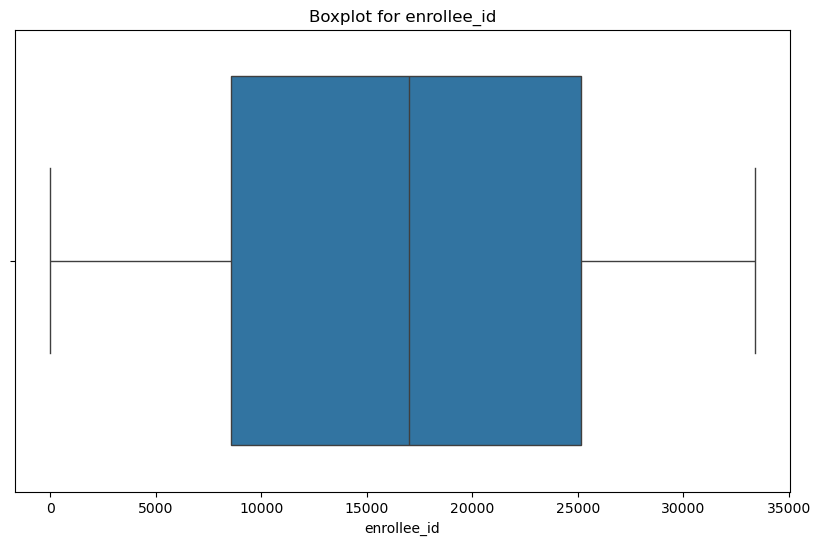

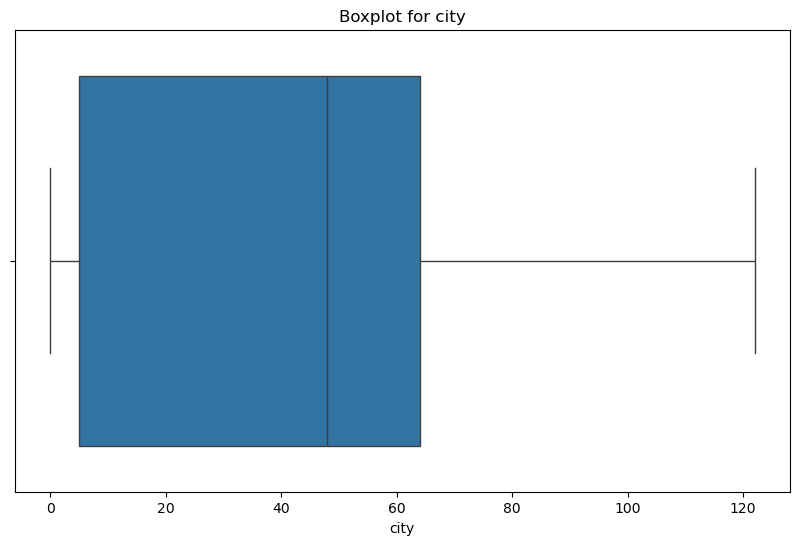

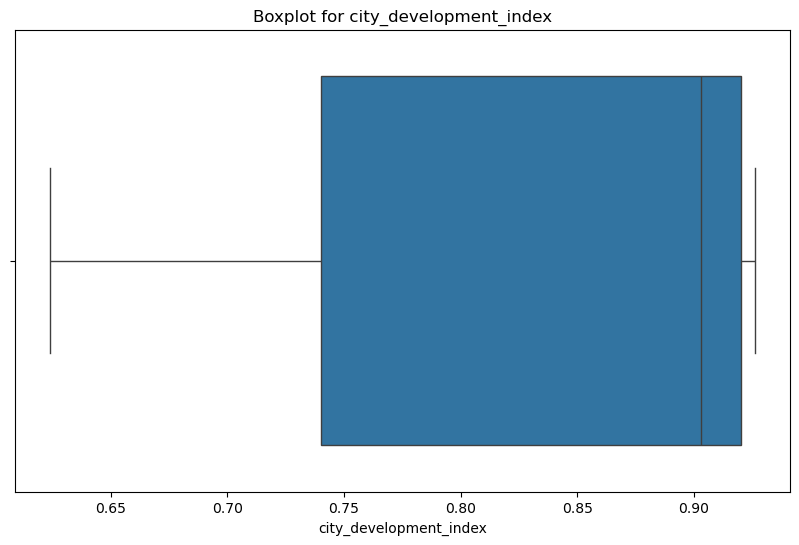

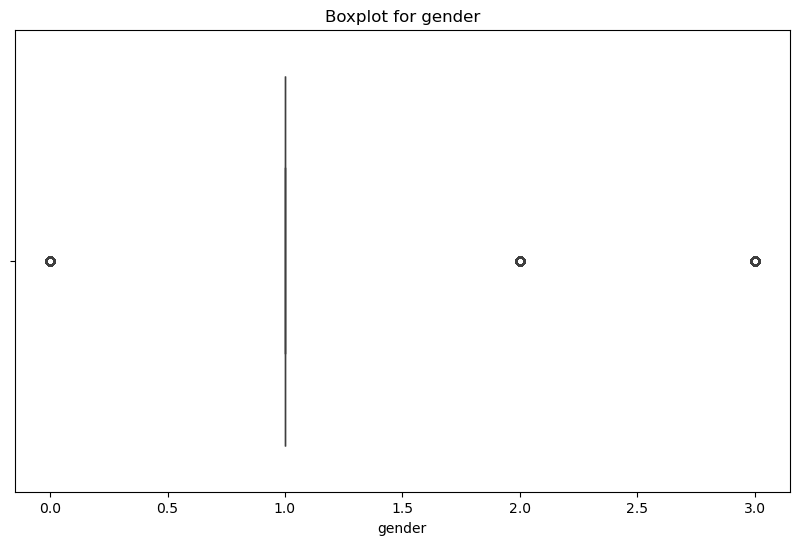

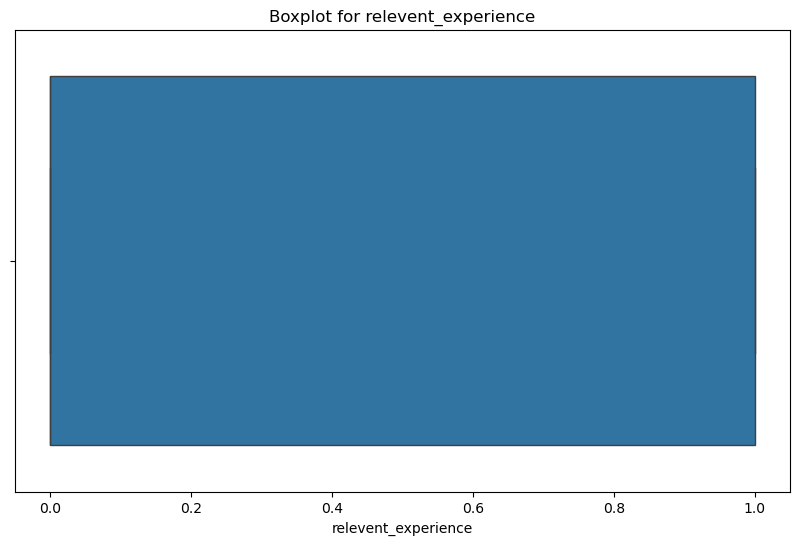

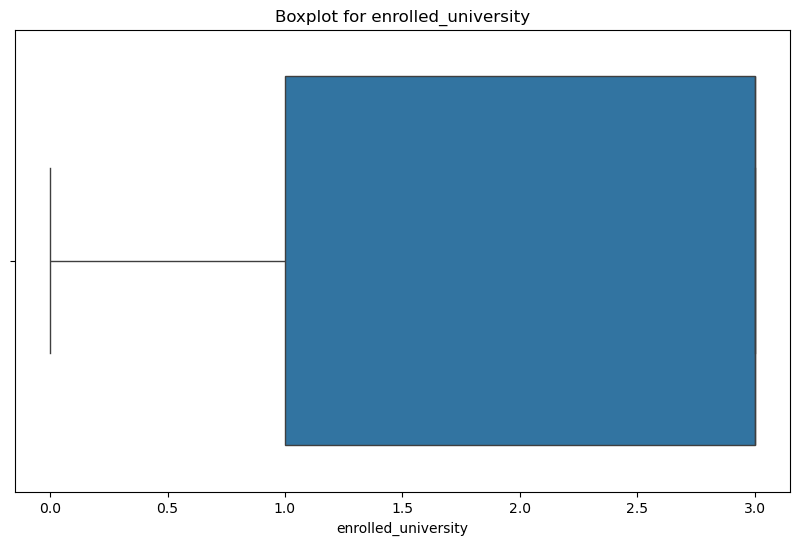

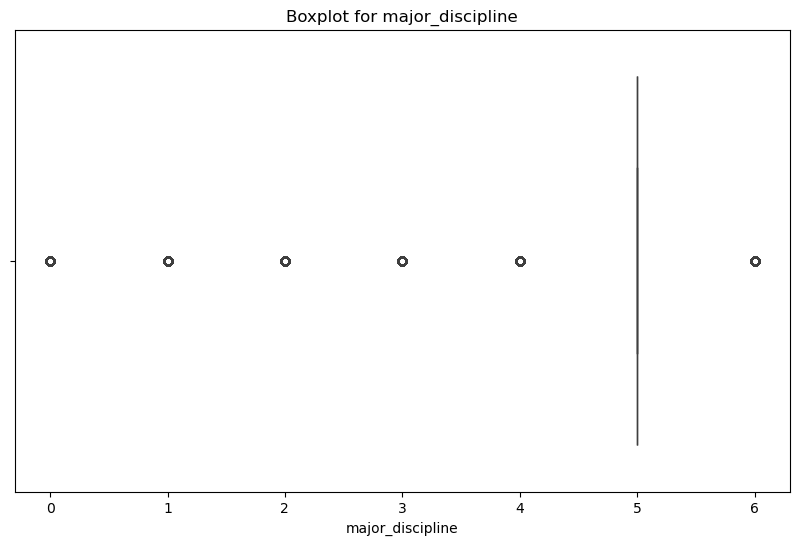

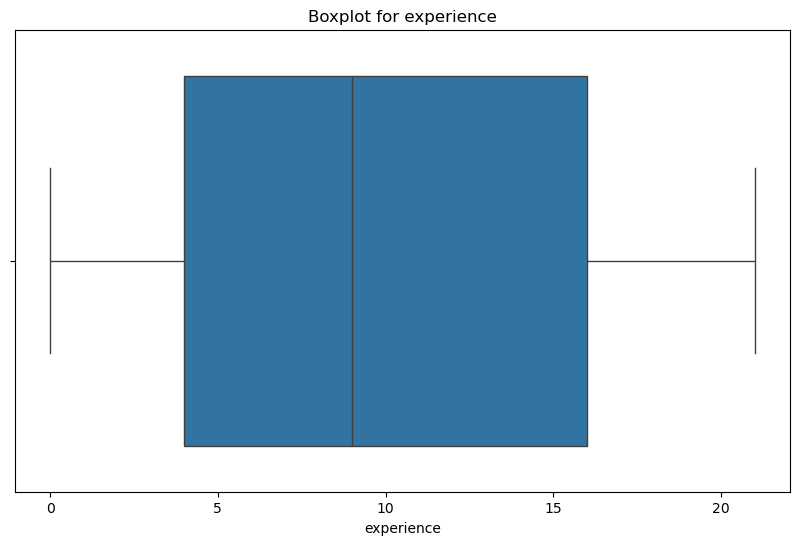

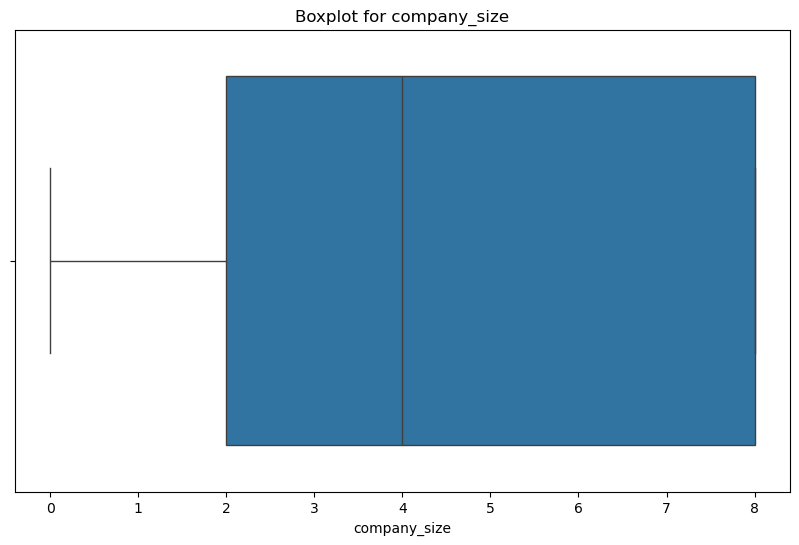

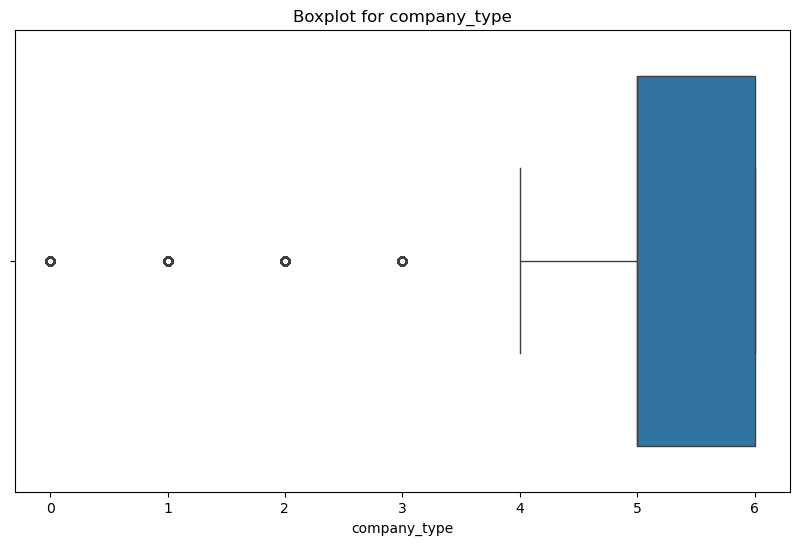

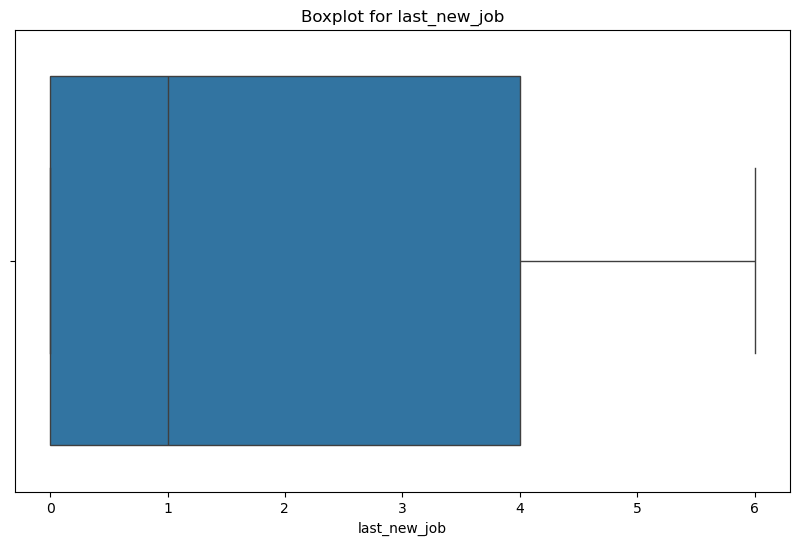

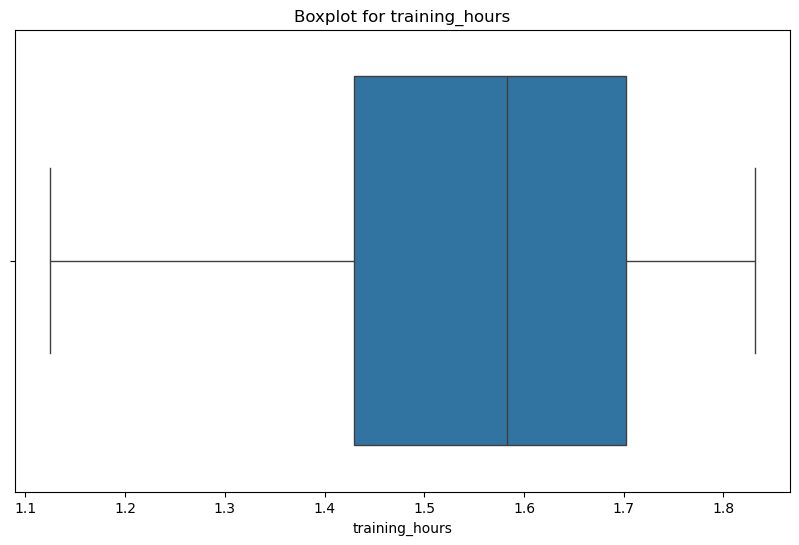

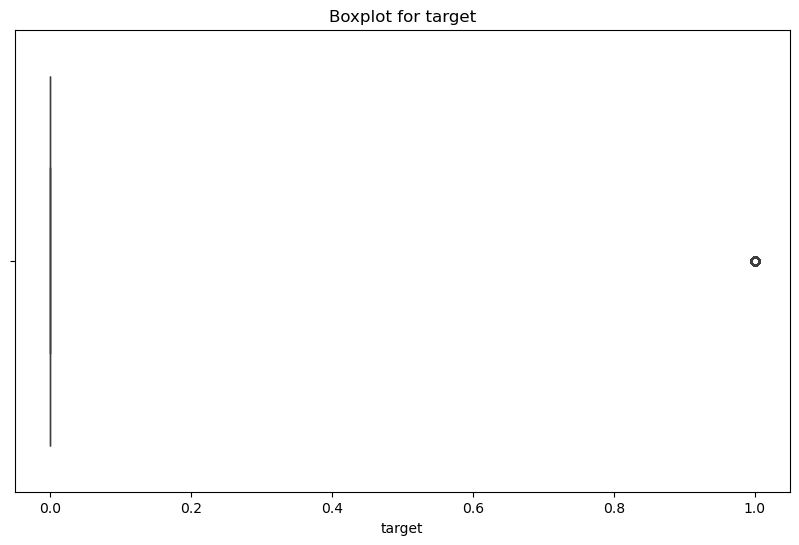

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df_train.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

In [17]:
Q1 = df_train['training_hours'].quantile(0.25)
Q3 = df_train['training_hours'].quantile(0.75)
IQR = Q3 - Q1

# outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['training_hours'] < lower_bound) | (df_train['training_hours'] > upper_bound)]
print(f"Number of outliers after capping: {len(outliers)}")

Number of outliers after capping: 0


In [9]:
statistical_summary = df_train.describe()
print(statistical_summary)

        enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000


In [51]:
df_train.dtypes
df_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [13]:
correlation = df_train['city_development_index'].corr(df_train['target'])
print(f'Correlation between city_development_index and target: {correlation}')

Correlation between city_development_index and target: -0.33985722771908533


In [28]:
df_train['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

### checking for duplicates

In [31]:
duplicates = df_train.duplicated().sum()
print(duplicates)

0


# Statistical Test

In [29]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['gender','city','relevent_experience',
       'experience', 'company_size', 'last_new_job',
       'target', 'company_type',
       'enrolled_university','education_level','major_discipline']

label_encoders = {}

# Encoding categorical columns in the DataFrame
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_train[col] = label_encoders[col].fit_transform(df_train[col].astype(str))

X = df_train.drop(['enrollee_id','target', 'training_hours', 'city_development_index'], axis=1)
y = df_train['target']

# Performing the Chi-Square test
chi2_scores, p_values = chi2(X, y)

chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
})

chi2_results.sort_values(by='Chi2 Score', ascending=False, inplace=True) #sorting by descending order

print("Chi-square Test Results:")
print(chi2_results)
print(" P value < 0.005 indicates that there is a strong relationship with the target")

Chi-square Test Results:
               Feature   Chi2 Score        P-value
0                 city  3745.839126   0.000000e+00
7         company_size  1184.327782  1.553560e-259
6           experience   507.326292  2.420695e-112
3  enrolled_university   282.753680   1.885958e-63
2  relevent_experience   227.490477   2.102037e-51
4      education_level   191.728725   1.333511e-43
8         company_type   123.986346   8.482530e-29
1               gender    52.225615   4.947651e-13
5     major_discipline     0.133143   7.151955e-01
9         last_new_job     0.132363   7.159945e-01
 P value < 0.005 indicates that there is a strong relationship with the target


In [21]:
from scipy.stats import f_oneway

group1_training_hours = df_train[df_train['target'] == 0]['training_hours']
group2_training_hours = df_train[df_train['target'] == 1]['training_hours']
anova_result_training = f_oneway(group1_training_hours, group2_training_hours)
print(f"ANOVA Test - p-value for 'training_hours': {anova_result_training.pvalue:.6f}")

group1_cdi = df_train[df_train['target'] == 0]['city_development_index']
group2_cdi = df_train[df_train['target'] == 1]['city_development_index']
anova_result_cdi = f_oneway(group1_cdi, group2_cdi)
print(f"ANOVA Test - p-value for 'city_development_index': {anova_result_cdi.pvalue:.6f}")


ANOVA Test - p-value for 'training_hours': 0.068195
ANOVA Test - p-value for 'city_development_index': 0.000000


# Data Preprocessing and Feature engineering

In [31]:
df_train['experience'] = df_train['experience'].replace({'>20': '21', '<1': '0'}).astype(float)
df_train['education_level'] = df_train['education_level'].fillna('unknown')
df_train['company_size'] = df_train['company_size'].fillna('unknown')


In [11]:
df_train['target'].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
# This method assigns a unique numeric value to each category
label_encoder = LabelEncoder()
categorical_columns = ['city','gender', 'relevent_experience', 'major_discipline','enrolled_university', 'company_size', 'last_new_job','company_type']
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col].astype(str))

In [35]:
# This method creates binary columns for each category, preserving all information without imposing ordinal relationships
df_train = pd.get_dummies(df_train, columns=[ 'education_level',], drop_first=True)

 # Train & Test Split

In [37]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['target','enrollee_id'])
y = df_train['target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.impute import SimpleImputer
# used simple imputer , because it helps in preventing biases that could arise from dropping rows or columns
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


# Standardization

In [41]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['city_development_index', 'experience', 'training_hours']] = scaler.fit_transform(X_train[['city_development_index', 'experience', 'training_hours']])
X_test[['city_development_index', 'experience', 'training_hours']] = scaler.transform(X_test[['city_development_index', 'experience', 'training_hours']])


from imblearn.over_sampling import SMOTE  # Importing SMOTE from imbalanced-learn

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
df_train.isnull().sum()

city                              0
city_development_index            0
gender                            0
relevent_experience               0
enrolled_university               0
major_discipline                  0
experience                        0
company_size                      0
company_type                      0
last_new_job                      0
training_hours                    0
target                            0
education_level_High School       0
education_level_Masters           0
education_level_Phd               0
education_level_Primary School    0
education_level_Unknown           0
dtype: int64

# Model Training and testing

# Random forest classifier

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Training model with class_weight='balanced'
clf = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42, class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=500,
                       random_state=42)

# Prediction and evaluation

In [44]:
# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", report)

Accuracy: 0.795929018789144
ROC-AUC Score: 0.797548290149393
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      2880
           1       0.58      0.65      0.61       952

    accuracy                           0.80      3832
   macro avg       0.73      0.75      0.74      3832
weighted avg       0.81      0.80      0.80      3832



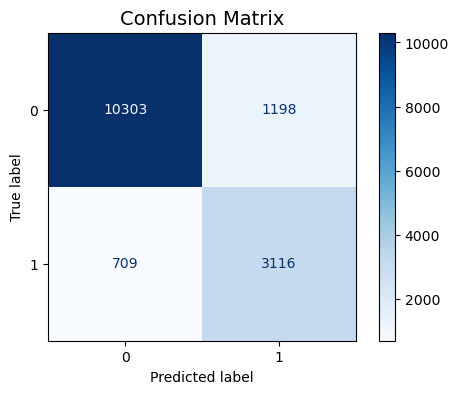

[[10303  1198]
 [  709  3116]]


In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the training dataset
y_train_pred = clf.predict(X_train)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix with numeric annotations
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figure size as needed
cm_display.plot(cmap='Blues', ax=ax, values_format='d')  # 'd' ensures integer display

# Add a title
ax.set_title("Confusion Matrix", fontsize=14)

# Show the plot
plt.show()
print(cm)


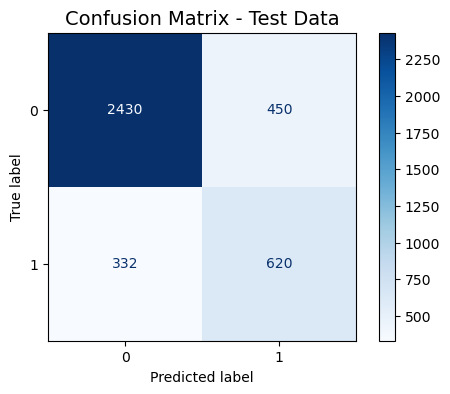

Confusion Matrix for Test Data:
[[2430  450]
 [ 332  620]]


In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test dataset
y_test_pred = clf.predict(X_test)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix with numeric annotations
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figure size as needed
cm_display_test.plot(cmap='Blues', ax=ax, values_format='d')  # 'd' ensures integer display

# Add a title
ax.set_title("Confusion Matrix - Test Data", fontsize=14)

# Show the plot
plt.show()

# Print the confusion matrix values
print("Confusion Matrix for Test Data:")
print(cm_test)


In [68]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize StratifiedKFold with 5 splits
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model (you can adjust hyperparameters if needed)
clf = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42, class_weight='balanced')

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=stratified_kf, scoring='accuracy')

# Print results
print(f"Cross-Validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


Cross-Validation Accuracy: 0.797 ± 0.002


# Prediction on Test Data

In [46]:
df_test = pd.read_csv(r"C:\Users\Sowmi\Downloads\aug_test.csv")

In [47]:
df_test.columns = df_test.columns.str.strip()


In [48]:
df_test.shape

(2129, 13)

In [33]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [79]:
df_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [81]:
statistical_summary_test = df_test.describe()
print(statistical_summary_test)

        enrollee_id  city_development_index  training_hours
count   2129.000000             2129.000000     2129.000000
mean   16861.614843                0.824984       64.983091
std     9576.846029                0.125074       60.238660
min        3.000000                0.448000        1.000000
25%     8562.000000                0.698000       23.000000
50%    16816.000000                0.903000       47.000000
75%    25129.000000                0.920000       86.000000
max    33353.000000                0.949000      334.000000


In [63]:
df_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size                0
company_type                0
last_new_job               40
training_hours              0
dtype: int64

In [38]:
def cap_outliers(df, column, lower_percentile=5, upper_percentile=95):
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    
    # Capping values below lower_limit to lower_limit
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    
    # Capping values above upper_limit to upper_limit
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    
    return df

df_test = cap_outliers(df_test, 'training_hours', 5, 95)
df_test = cap_outliers(df_test, 'city_development_index', 5, 95)

print(df_test[['training_hours', 'city_development_index']].describe())


df_test['training_hours'] = np.log1p(df_test['training_hours'])
df_test['city_development_index'] = np.log1p(df_test['city_development_index'])

       training_hours  city_development_index
count     2129.000000             2129.000000
mean        62.082198                0.827644
std         50.570935                0.118483
min          7.000000                0.624000
25%         23.000000                0.698000
50%         47.000000                0.903000
75%         86.000000                0.920000
max        192.000000                0.926000


In [40]:
df_test['experience'] = df_test['experience'].replace({'>20': '21', '<1': '0'}).astype(float)
df_test['education_level'] = df_test['education_level'].fillna('Unknown')
df_test['company_size'] = df_test['company_size'].fillna('Unknown')

In [45]:
label_encoder = LabelEncoder()
categorical_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university',
                       'major_discipline', 'company_size', 'company_type', 'last_new_job']
label_encoders = {}

# Fit LabelEncoder on the training data and save the mappings
for col in categorical_columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col].astype(str))
    label_encoders[col] = le

# Apply the saved encoders to the test data
for col in categorical_columns:
    le = label_encoders[col]
    df_test[col] = df_test[col].astype(str).apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


In [47]:
df_test = pd.get_dummies(df_test, columns=['education_level'], drop_first=True)


In [49]:
# Align columns in test data to match the training data
missing_cols = set(X.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0
df_test = df_test[X.columns]  # Reorder columns to match the training data

In [51]:
X_test_final = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

# standardization

In [53]:
# Standardize numerical columns in test data using the scaler fitted on training data
scaler = StandardScaler()
X_test_final[['city_development_index', 'experience', 'training_hours']] = scaler.fit_transform(
    X_test_final[['city_development_index', 'experience', 'training_hours']])


# Test data Prediction

In [57]:
# Predict on the test dataset
test_predictions = clf.predict(X_test_final)

# Output the predictions
df_test['predictions'] = test_predictions
df_test.to_csv(r"C:\Users\Sowmi\Downloads\aug_test_predictions.csv", index=False)

print("Predictions for the test dataset have been saved to 'aug_test_predictions.csv'.")

Predictions for the test dataset have been saved to 'aug_test_predictions.csv'.


# other models considered for this problem

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Prepare the data
X = df_train.drop(columns=['target'])  # Drop target and ID columns
y = df_train['target']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7703549060542797
Confusion Matrix:
[[2663  217]
 [ 663  289]]


In [62]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the model
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


C:\Users\Sowmi\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:42:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7831419624217119
Confusion Matrix:
[[2517  363]
 [ 468  484]]


In [64]:
from sklearn.svm import SVC

# Initialize and train the model
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7515657620041754
Confusion Matrix:
[[2880    0]
 [ 952    0]]


In [143]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.7617432150313153
Confusion Matrix:
[[2543  337]
 [ 576  376]]


In [145]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = model_nb.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Accuracy: 0.7471294363256785
Confusion Matrix:
[[2332  548]
 [ 421  531]]
